In [1]:
library(tidyverse)
library(ggpubr)
library(gridExtra)
library(caret)
library(e1071)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v ggplot2 3.3.3     v purrr   0.3.2
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'forcats' was built under R version 3.6.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'ggpubr' was built under R version 3.6.3"
Warning message:
"package 'gridExtra' was built under R version 3.6.3"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Loading required package: lattice

In [2]:
#Muda o diretório de trabalho

setwd("Dados")

In [3]:
#Importando arquivos do tipo CSV - funcao read.table

bank_data <- read.table("bank-full.csv"
                       , header = TRUE, sep = ";")

In [4]:
#Conhecendo a base de daods

head(bank_data)

dim(bank_data)

str(bank_data)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


[1] 45211    17

'data.frame':	45211 obs. of  17 variables:
 $ age      : int  58 44 33 47 33 35 28 42 58 43 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 5 10 3 2 12 5 5 3 6 10 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 2 3 2 2 3 2 3 1 2 3 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 3 2 2 4 4 3 3 3 1 2 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 2 1 1 ...
 $ balance  : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing  : Factor w/ 2 levels "no","yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 2 1 1 1 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ day      : int  5 5 5 5 5 5 5 5 5 5 ...
 $ month    : Factor w/ 12 levels "apr","aug","dec",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ duration : int  261 151 76 92 198 139 217 380 50 55 ...
 $ campaign : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : int  0 0 0

In [5]:
bank_data %>% count(y)

y,n
no,39922
yes,5289


In [6]:
#Visualizadno as variaveis categoricas - Factor

round(prop.table(table(bank_data$job,bank_data$y, dnn = c("Job", "Target")),1)*100,2)
round(prop.table(table(bank_data$marital,bank_data$y, dnn = c("Marital", "Target")),1)*100,2)
round(prop.table(table(bank_data$education,bank_data$y, dnn = c("Education", "Target")),1)*100,2)
round(prop.table(table(bank_data$default,bank_data$y, dnn = c("Default", "Target")),1)*100,2)
round(prop.table(table(bank_data$housing,bank_data$y, dnn = c("Housing", "Target")),1)*100,2)
round(prop.table(table(bank_data$loan,bank_data$y, dnn = c("Loan", "Target")),1)*100,2)
round(prop.table(table(bank_data$contact,bank_data$y, dnn = c("Contact", "Target")),1)*100,2)
round(prop.table(table(bank_data$month,bank_data$y, dnn = c("Month", "Target")),1)*100,2)
round(prop.table(table(bank_data$poutcome,bank_data$y, dnn = c("Poutcome", "Target")),1)*100,2)

               Target
Job                no   yes
  admin.        87.80 12.20
  blue-collar   92.73  7.27
  entrepreneur  91.73  8.27
  housemaid     91.21  8.79
  management    86.24 13.76
  retired       77.21 22.79
  self-employed 88.16 11.84
  services      91.12  8.88
  student       71.32 28.68
  technician    88.94 11.06
  unemployed    84.50 15.50
  unknown       88.19 11.81

          Target
Marital       no   yes
  divorced 88.05 11.95
  married  89.88 10.12
  single   85.05 14.95

           Target
Education      no   yes
  primary   91.37  8.63
  secondary 89.44 10.56
  tertiary  84.99 15.01
  unknown   86.43 13.57

       Target
Default    no   yes
    no  88.20 11.80
    yes 93.62  6.38

       Target
Housing   no  yes
    no  83.3 16.7
    yes 92.3  7.7

     Target
Loan     no   yes
  no  87.34 12.66
  yes 93.32  6.68

           Target
Contact        no   yes
  cellular  85.08 14.92
  telephone 86.58 13.42
  unknown   95.93  4.07

     Target
Month    no   yes
  apr 80.32 19.68
  aug 88.99 11.01
  dec 53.27 46.73
  feb 83.35 16.65
  jan 89.88 10.12
  jul 90.91  9.09
  jun 89.78 10.22
  mar 48.01 51.99
  may 93.28  6.72
  nov 89.85 10.15
  oct 56.23 43.77
  sep 53.54 46.46

         Target
Poutcome     no   yes
  failure 87.39 12.61
  other   83.32 16.68
  success 35.27 64.73
  unknown 90.84  9.16

In [7]:
#Visualizadno as variaveis continuas

bp_age <- ggplot(bank_data, aes(x = y, y = age)) +
        geom_boxplot(fill = "#228822", colour = "#1F3552", alpha = 0.6) +
        scale_y_continuous(name = "Age") +
        scale_x_discrete(name = "Target") +
        ggtitle("Age") +
        theme_gray() + 
        theme(plot.title = element_text(hjust = 0.5))

bp_balance <- ggplot(bank_data, aes(x = y, y = balance)) +
        geom_boxplot(fill = "#228822", colour = "#1F3552", alpha = 0.6) +
        scale_y_continuous(name = "Balance") +
        scale_x_discrete(name = "Target") +
        ggtitle("Balance") +
        theme_gray() + 
        theme(plot.title = element_text(hjust = 0.5))

bp_day <- ggplot(bank_data, aes(x = y, y = day)) +
        geom_boxplot(fill = "#228822", colour = "#1F3552", alpha = 0.6) +
        scale_y_continuous(name = "Day") +
        scale_x_discrete(name = "Target") +
        ggtitle("Day") +
        theme_gray() + 
        theme(plot.title = element_text(hjust = 0.5))

bp_duration <- ggplot(bank_data, aes(x = y, y = duration)) +
        geom_boxplot(fill = "#228822", colour = "#1F3552", alpha = 0.6) +
        scale_y_continuous(name = "Duration") +
        scale_x_discrete(name = "Target") +
        ggtitle("Duration") +
        theme_gray() + 
        theme(plot.title = element_text(hjust = 0.5))

bp_campaign <- ggplot(bank_data, aes(x = y, y = campaign)) +
        geom_boxplot(fill = "#228822", colour = "#1F3552", alpha = 0.6) +
        scale_y_continuous(name = "Campaign") +
        scale_x_discrete(name = "Target") +
        ggtitle("Campaign") +
        theme_gray() + 
        theme(plot.title = element_text(hjust = 0.5))

bp_pdays <- ggplot(bank_data, aes(x = y, y = pdays)) +
        geom_boxplot(fill = "#228822", colour = "#1F3552", alpha = 0.6) +
        scale_y_continuous(name = "Pdays") +
        scale_x_discrete(name = "Target") +
        ggtitle("Pdays") +
        theme_gray() + 
        theme(plot.title = element_text(hjust = 0.5))

bp_previous <- ggplot(bank_data, aes(x = y, y = previous)) +
        geom_boxplot(fill = "#228822", colour = "#1F3552", alpha = 0.6) +
        scale_y_continuous(name = "Previous") +
        scale_x_discrete(name = "Target") +
        ggtitle("Previous") +
        theme_gray() + 
        theme(plot.title = element_text(hjust = 0.5))

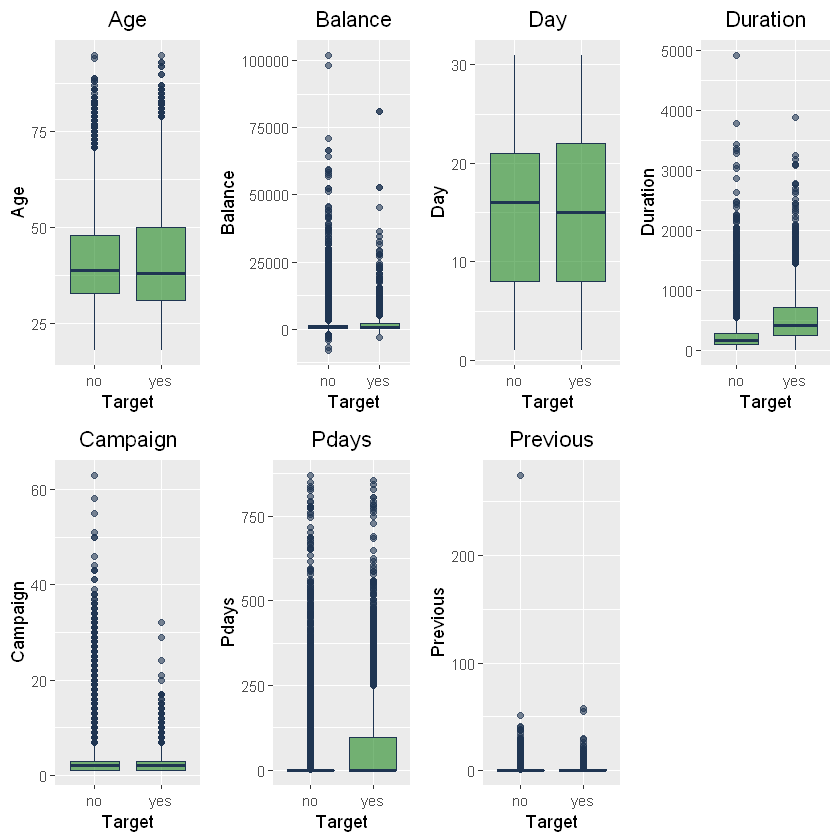

In [8]:
grid.arrange(bp_age, bp_balance, bp_day, bp_duration, bp_campaign, bp_pdays, bp_previous, nrow = 2, ncol = 4)

In [9]:
job <- bank_data %>% count(job,y)
marital <- bank_data %>% count(marital,y)
education <- bank_data %>% count(education,y)
default <- bank_data %>% count(default,y)
housing <- bank_data %>% count(housing,y)
loan <- bank_data %>% count(loan,y)
contact <- bank_data %>% count(contact,y)
month <- bank_data %>% count(month,y)
poutcome <- bank_data %>% count(poutcome,y)

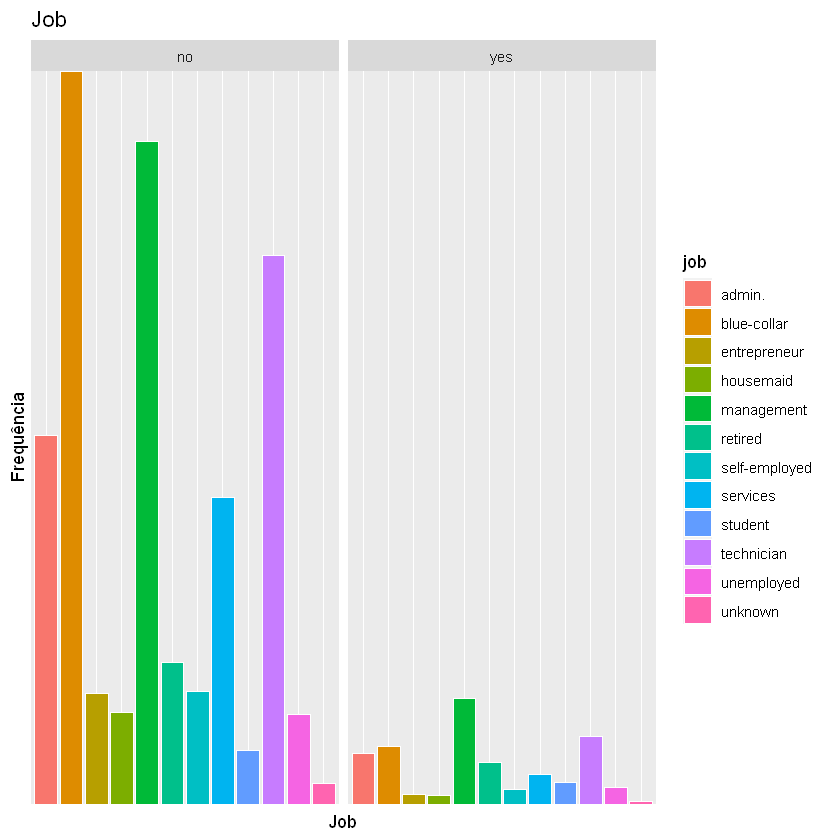

In [10]:
bp_job <- ggplot(job, aes(x = job, y = n)) +
        geom_bar(aes(fill = job), stat = "identity", color = "white") +
        scale_y_discrete(name = "Frequência") +
        scale_x_discrete(name = "Job") +
        ggtitle("Job") +
        facet_wrap(~y) +
        theme_gray() +
        theme(axis.text.x = element_blank(), axis.ticks = element_blank())

bp_job

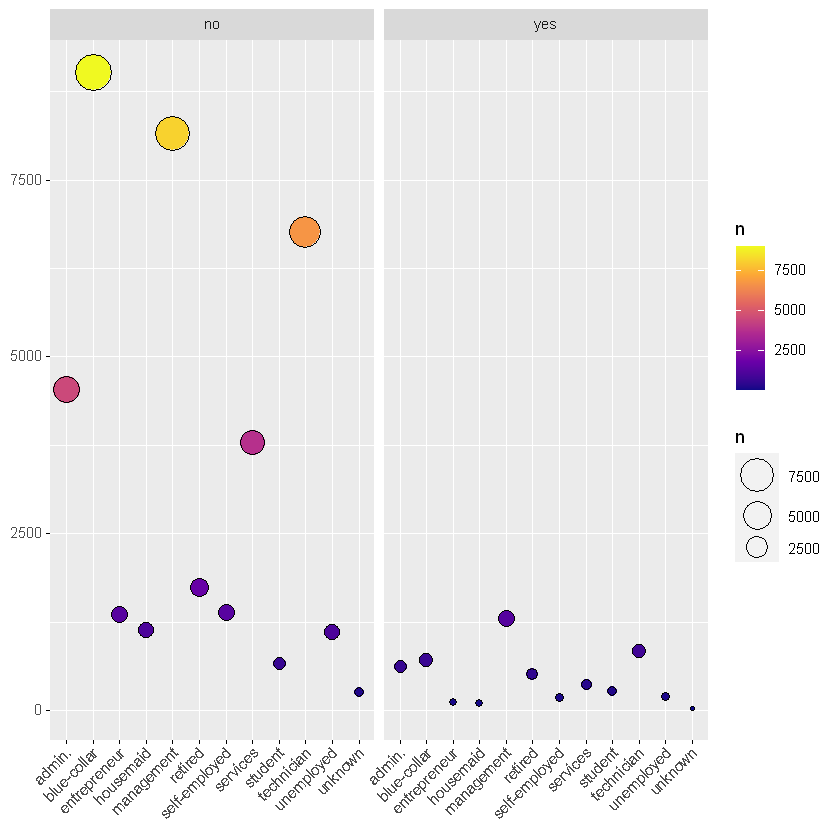

In [11]:
ggballoonplot(job, x = "job", y = "n", size = "n", fill = "n", facet.by = "y", ggtheme = theme_gray()) +
scale_fill_viridis_c(option = "C")

In [12]:
bp_marital <- ggplot(marital, aes(x = marital, y = n)) +
        geom_bar(aes(fill = marital), stat = "identity", color = "white") +
        scale_y_discrete(name = "Frequência") +
        scale_x_discrete(name = "Marital") +
        ggtitle("Marital") +
        facet_wrap(~y) +
        theme_gray() +
        theme(axis.text.x = element_blank(), axis.ticks = element_blank())

bp_education <- ggplot(education, aes(x = education, y = n)) +
        geom_bar(aes(fill = education), stat = "identity", color = "white") +
        scale_y_discrete(name = "Frequência") +
        scale_x_discrete(name = "Education") +
        ggtitle("Education") +
        facet_wrap(~y) +
        theme_gray() +
        theme(axis.text.x = element_blank(), axis.ticks = element_blank())

bp_default <- ggplot(default, aes(x = default, y = n)) +
        geom_bar(aes(fill = default), stat = "identity", color = "white") +
        scale_y_discrete(name = "Frequência") +
        scale_x_discrete(name = "Default") +
        ggtitle("Default") +
        facet_wrap(~y) +
        theme_gray() +
        theme(axis.text.x = element_blank(), axis.ticks = element_blank())

bp_housing <- ggplot(housing, aes(x = housing, y = n)) +
        geom_bar(aes(fill = housing), stat = "identity", color = "white") +
        scale_y_discrete(name = "Frequência") +
        scale_x_discrete(name = "Housing") +
        ggtitle("Housing") +
        facet_wrap(~y) +
        theme_gray() +
        theme(axis.text.x = element_blank(), axis.ticks = element_blank())

bp_loan <- ggplot(loan, aes(x = loan, y = n)) +
        geom_bar(aes(fill = loan), stat = "identity", color = "white") +
        scale_y_discrete(name = "Frequência") +
        scale_x_discrete(name = "Loan") +
        ggtitle("Loan") +
        facet_wrap(~y) +
        theme_gray() +
        theme(axis.text.x = element_blank(), axis.ticks = element_blank())

bp_contact <- ggplot(contact, aes(x = contact, y = n)) +
        geom_bar(aes(fill = contact), stat = "identity", color = "white") +
        scale_y_discrete(name = "Frequência") +
        scale_x_discrete(name = "Contact") +
        ggtitle("Contact") +
        facet_wrap(~y) +
        theme_gray() +
        theme(axis.text.x = element_blank(), axis.ticks = element_blank())

bp_month <- ggplot(month, aes(x = month, y = n)) +
        geom_bar(aes(fill = month), stat = "identity", color = "white") +
        scale_y_discrete(name = "Frequência") +
        scale_x_discrete(name = "Month") +
        ggtitle("Month") +
        facet_wrap(~y) +
        theme_gray() +
        theme(axis.text.x = element_blank(), axis.ticks = element_blank())

bp_poutcome <- ggplot(poutcome, aes(x = poutcome, y = n)) +
        geom_bar(aes(fill = poutcome), stat = "identity", color = "white") +
        scale_y_discrete(name = "Frequência") +
        scale_x_discrete(name = "Poutcome") +
        ggtitle("Poutcome") +
        facet_wrap(~y) +
        theme_gray() +
        theme(axis.text.x = element_blank(), axis.ticks = element_blank())

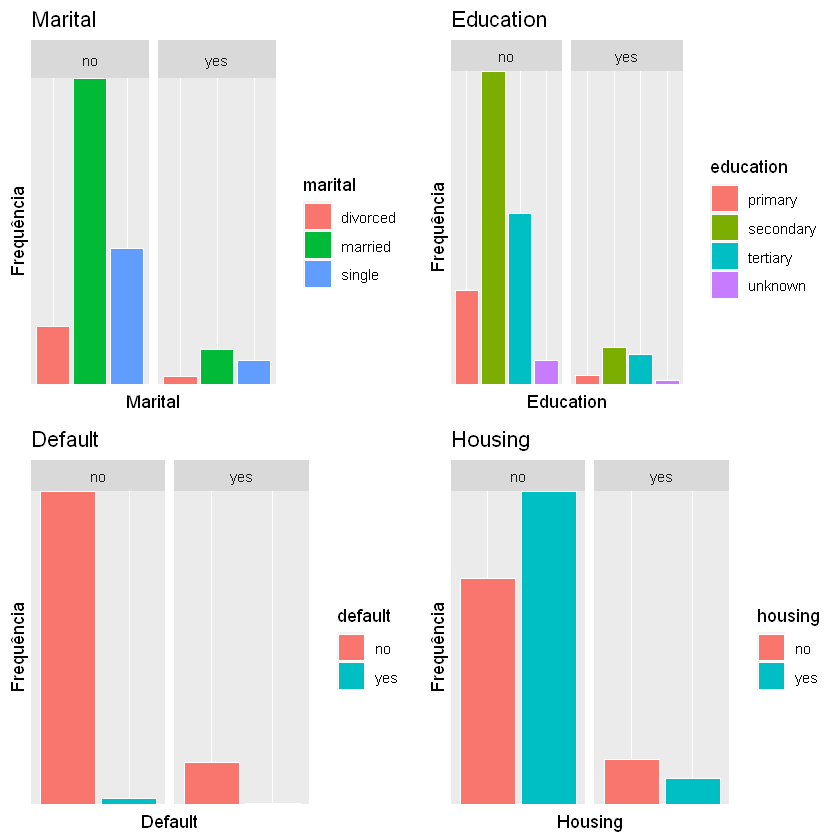

In [13]:
grid.arrange(bp_marital, bp_education, bp_default, bp_housing, nrow = 2, ncol = 2)

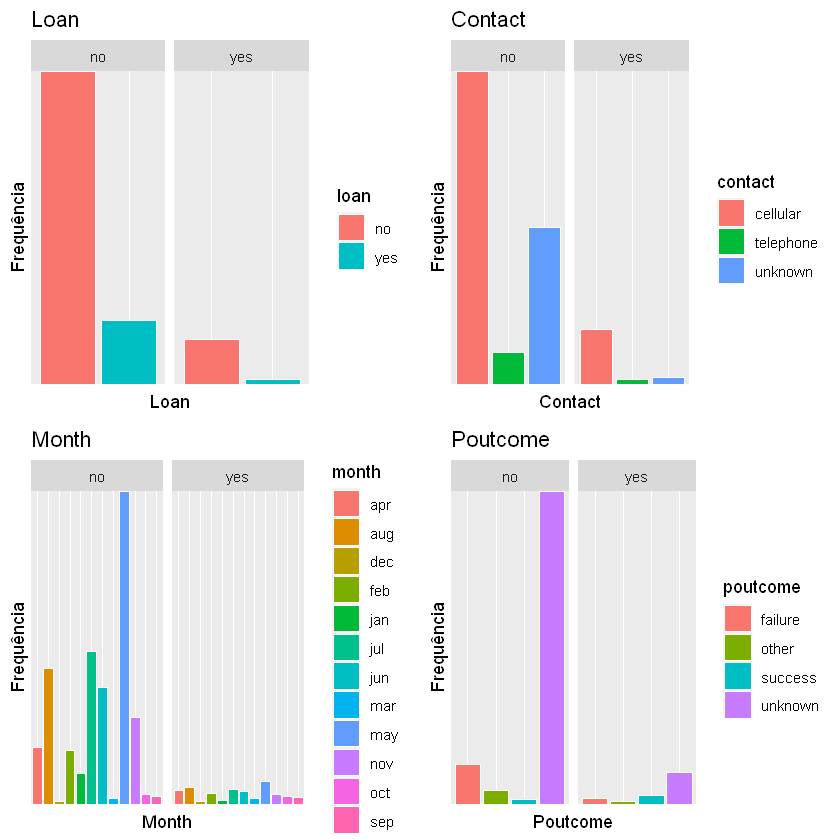

In [14]:
grid.arrange(bp_loan, bp_contact, bp_month, bp_poutcome, nrow = 2, ncol = 2)

<b>1ª Versão do Modelo</b>

In [15]:
set.seed(42)

inTrain1 <- createDataPartition(bank_data$y, p = 0.7, list = FALSE)

train1 <- bank_data[inTrain1, ]

test1 <- bank_data[-inTrain1, ]

dim(train1)
dim(test1)

[1] 31649    17

[1] 13562    17

In [16]:
# Treinamento do modelo 1

nb1 <- naiveBayes(y ~ ., data = train1, laplace = 1)

print(nb1)


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
       no       yes 
0.8829979 0.1170021 

Conditional probabilities:
     age
Y         [,1]     [,2]
  no  40.81518 10.14110
  yes 41.60897 13.40696

     job
Y          admin. blue-collar entrepreneur   housemaid  management     retired
  no  0.113098219 0.227019100  0.033729165 0.028972029 0.205808713 0.043171901
  yes 0.118169583 0.132436070  0.021534320 0.019919246 0.249259758 0.095558546
     job
Y     self-employed    services     student  technician  unemployed     unknown
  no    0.034158380 0.095214250 0.016274412 0.169075041 0.026969025 0.006509765
  yes   0.035800808 0.066218035 0.050605653 0.162045760 0.041453567 0.006998654

     marital
Y      divorced   married    single
  no  0.1161759 0.6100755 0.2737486
  yes 0.1184566 0.5153805 0.3661630

     education
Y        primary  secondary   tertiary    unknown
  no  0.15735242 0.51871199 0.2

In [17]:
# Previsao na base de treinamento

nb_train_pred1 <- predict(nb1, train1, type = "class")

confusionMatrix(nb_train_pred1, train1$y, positive = "yes")

Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  25849  1681
       yes  2097  2022
                                         
               Accuracy : 0.8806         
                 95% CI : (0.877, 0.8842)
    No Information Rate : 0.883          
    P-Value [Acc > NIR] : 0.9064         
                                         
                  Kappa : 0.4491         
                                         
 Mcnemar's Test P-Value : 1.461e-11      
                                         
            Sensitivity : 0.54604        
            Specificity : 0.92496        
         Pos Pred Value : 0.49090        
         Neg Pred Value : 0.93894        
             Prevalence : 0.11700        
         Detection Rate : 0.06389        
   Detection Prevalence : 0.13015        
      Balanced Accuracy : 0.73550        
                                         
       'Positive' Class : yes            
                                      

In [18]:
# Previsão na base de teste

nb_test_pred1 <- predict(nb1, test1, type = "class")

confusionMatrix(nb_test_pred1, test1$y, positive = "yes")

Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  11041   736
       yes   935   850
                                          
               Accuracy : 0.8768          
                 95% CI : (0.8711, 0.8823)
    No Information Rate : 0.8831          
    P-Value [Acc > NIR] : 0.9884          
                                          
                  Kappa : 0.4342          
                                          
 Mcnemar's Test P-Value : 1.274e-06       
                                          
            Sensitivity : 0.53594         
            Specificity : 0.92193         
         Pos Pred Value : 0.47619         
         Neg Pred Value : 0.93751         
             Prevalence : 0.11694         
         Detection Rate : 0.06268         
   Detection Prevalence : 0.13162         
      Balanced Accuracy : 0.72893         
                                          
       'Positive' Class : yes             
                  

<b>2ª Versão do Modelo - Trabalhando com bases desbalanceadas</b>

In [19]:
bank_oversample <- upSample(bank_data, bank_data$y)

str(bank_oversample)

'data.frame':	79844 obs. of  17 variables:
 $ age      : int  58 44 33 47 33 35 28 42 58 43 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 5 10 3 2 12 5 5 3 6 10 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 2 3 2 2 3 2 3 1 2 3 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 3 2 2 4 4 3 3 3 1 2 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 2 1 1 ...
 $ balance  : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing  : Factor w/ 2 levels "no","yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 2 1 1 1 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ day      : int  5 5 5 5 5 5 5 5 5 5 ...
 $ month    : Factor w/ 12 levels "apr","aug","dec",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ duration : int  261 151 76 92 198 139 217 380 50 55 ...
 $ campaign : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : int  0 0 0

In [20]:
bank_oversample %>% count(Class)

Class,n
no,39922
yes,39922


In [23]:
set.seed(42)

inTrain2 <- createDataPartition(bank_oversample$Class, p = 0.7, list = FALSE)

train2 <- bank_oversample[inTrain2, ]

test2 <- bank_oversample[-inTrain2, ]

dim(train2)
dim(test2)

[1] 55892    17

[1] 23952    17

In [24]:
# Treinamento do modelo 2

nb2 <- naiveBayes(Class ~ .
                    , data = train2)

In [26]:
# Previsão na base de treinamento 2 

nb_train_pred2 <- predict(nb2, train2, type = "class")

confusionMatrix(nb_train_pred2, train2$Class, positive = "yes")

# Previsão na base de teste 2

nb_test_pred2 <- predict(nb2, test2, type = "class")

confusionMatrix(nb_test_pred2, test2$Class, positive = "yes")

Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  22071  6027
       yes  5875 21919
                                          
               Accuracy : 0.7871          
                 95% CI : (0.7836, 0.7904)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.5741          
                                          
 Mcnemar's Test P-Value : 0.1663          
                                          
            Sensitivity : 0.7843          
            Specificity : 0.7898          
         Pos Pred Value : 0.7886          
         Neg Pred Value : 0.7855          
             Prevalence : 0.5000          
         Detection Rate : 0.3922          
   Detection Prevalence : 0.4973          
      Balanced Accuracy : 0.7871          
                                          
       'Positive' Class : yes             
                  

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  9390 2703
       yes 2586 9273
                                          
               Accuracy : 0.7792          
                 95% CI : (0.7739, 0.7844)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.5584          
                                          
 Mcnemar's Test P-Value : 0.1107          
                                          
            Sensitivity : 0.7743          
            Specificity : 0.7841          
         Pos Pred Value : 0.7819          
         Neg Pred Value : 0.7765          
             Prevalence : 0.5000          
         Detection Rate : 0.3871          
   Detection Prevalence : 0.4951          
      Balanced Accuracy : 0.7792          
                                          
       'Positive' Class : yes             
                        

In [29]:
# Previsão na base de test 1 - dados sem oversampling

nb_test_pred_no_over <- predict(nb2, test1, type="class")

confusionMatrix(nb_test_pred_no_over, test1$y, positive = "yes")

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  9390  373
       yes 2586 1213
                                          
               Accuracy : 0.7818          
                 95% CI : (0.7748, 0.7887)
    No Information Rate : 0.8831          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3419          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.76482         
            Specificity : 0.78407         
         Pos Pred Value : 0.31929         
         Neg Pred Value : 0.96179         
             Prevalence : 0.11694         
         Detection Rate : 0.08944         
   Detection Prevalence : 0.28012         
      Balanced Accuracy : 0.77444         
                                          
       'Positive' Class : yes             
                        

In [30]:
confusionMatrix(nb_test_pred1, test1$y, positive = "yes")

Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  11041   736
       yes   935   850
                                          
               Accuracy : 0.8768          
                 95% CI : (0.8711, 0.8823)
    No Information Rate : 0.8831          
    P-Value [Acc > NIR] : 0.9884          
                                          
                  Kappa : 0.4342          
                                          
 Mcnemar's Test P-Value : 1.274e-06       
                                          
            Sensitivity : 0.53594         
            Specificity : 0.92193         
         Pos Pred Value : 0.47619         
         Neg Pred Value : 0.93751         
             Prevalence : 0.11694         
         Detection Rate : 0.06268         
   Detection Prevalence : 0.13162         
      Balanced Accuracy : 0.72893         
                                          
       'Positive' Class : yes             
                  